In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print('Load Packages')

Load Packages


In [2]:
env = gym.make('FrozenLake8x8-v0')

obs_space = env.observation_space
n_state = obs_space.n
print('Observation space')
print("Total {} states".format(n_state))

act_space = env.action_space
n_act = act_space.n
print('Action space')
print("Total {} actions".format(n_act))

Observation space
Total 64 states
Action space
Total 4 actions


# Value Iteration

$$\begin{align}
v_{k+1}(s) &\doteq \max_a q_k(s, a)\\
&=\max_a \sum_{s', r} p(s', r \mid s, a) \bigg[ r + \gamma v_{k}(s') \bigg]
\end{align}$$

In [3]:
def get_default_policy(env, seed=0):
    if seed is not None:
        np.random.seed(1)
        
    n_state = env.observation_space.n
    n_act = env.action_space.n
    
    policy = np.random.uniform(size=(n_state,n_act)) # sample random number between 0 and 1
    policy = policy/np.sum(policy,axis=1,keepdims=True) # make it sum to 1
    
    return policy

In [4]:
def get_default_value(n_state, seed=0):
    if seed is not None:
        np.random.seed(1)
    
    return np.random.uniform(size=(n_state, 1))

In [7]:
def value_iteration(env, gamma=0.99, epsilon=1e-6):
    n_state = env.observation_space.n
    n_act = env.action_space.n

    P = env.unwrapped.P

    value = get_default_value(n_state)

    while True:
        q = np.zeros((n_state, n_act))
        for s in P.keys():
            for a in P[s].keys():
                for prob, next_s, reward, done in P[s][a]:
                    q[s][a] += prob * (reward + gamma * value[next_s])
        v_prime = np.max(q, axis=1)

        dist = np.max(np.abs(value - v_prime))
        value = v_prime
        if dist < epsilon:
            break

    policy = np.zeros((n_state, n_act))
    policy[np.arange(n_state), np.argmax(q, axis=1)] = 1

    return policy, value


def plot_results(policy, value):
    plt.figure(num=0)
    plt.imshow(np.reshape(value,(8,8)))
    plt.title("Value Function")  
    arr_len = 0.2
    for i in range(8):
        for j in range(8):
            s = i*8+j
            if policy[s][0]> 0:
                plt.arrow(j,i,-arr_len,0,color="r",alpha=policy[s][0],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][1]> 0:
                plt.arrow(j,i,0,arr_len,color="r",alpha=policy[s][1],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][2]> 0:
                plt.arrow(j,i,arr_len,0,color="r",alpha=policy[s][2],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
            if policy[s][3]> 0:
                plt.arrow(j,i,0,-arr_len,color="r",alpha=policy[s][3],width=0.01,head_width=0.5,head_length=0.1,overhang=1)
    plt.show()

Value Iteration Compact
Computation Time : 0.73



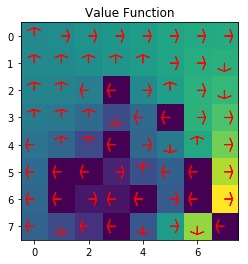

[[ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0

In [8]:
if __name__=='__main__': 
    print("Value Iteration Compact")
    import time
    start = time.time()
    policy, value = value_iteration(env)
    print("Computation Time : %.2f"%(time.time() - start))
    print('')
    
    plot_results(policy, value)
    np.set_printoptions(precision=5,suppress=True)
    print(policy)

###### Run optimal policy

In [9]:
obs = env.reset()

for t in range(100000):
    print('t = %d'%t)
    env.render()
    print('')
    
    action = np.random.choice(n_act, 1, p=policy[obs][:])[0]
    next_obs, reward, done, info = env.step(action)
    obs = next_obs
    if done:
        break
env.render()
env.close()

t = 0

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 1
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 2
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 3
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 4
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 5
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 6
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 7
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 8
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 9
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 10
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 11
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF


# Numpy Version

In [10]:
def value_iteration_np(env, gamma=0.99, epsilon=1e-6):
    n_state = env.observation_space.n
    n_act = env.action_space.n
    
    r = np.zeros((n_state, n_act, n_state))
    P = np.zeros((n_state, n_act, n_state))
    for s in env.unwrapped.P.keys():
        for a in env.unwrapped.P[s].keys():
            for prob, next_s, reward, done in env.unwrapped.P[s][a]:
                r[s][a][next_s] = reward
                P[s][a][next_s] = prob

    value = get_default_value(n_state)

    while True:
        q = np.sum((r + gamma * np.tile(value.ravel()[np.newaxis, np.newaxis, :], reps=(n_state, n_act, 1))) * P, axis=2)
        v_prime = np.max(q, axis=1)
        
        dist = np.max(np.abs(value - v_prime))
        value = v_prime
        if dist < epsilon:
            break

    policy = np.zeros((n_state, n_act))
    policy[np.arange(n_state), np.argmax(q, axis=1)] = 1

    return policy, value

Policy Iteration Compact
Computation Time : 0.16



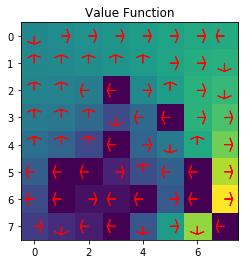

t = 0

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 1
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 2
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 3
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 4
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 5
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 6
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 7
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 8
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 9
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 10
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

t = 11
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF

In [11]:
if __name__=='__main__': 
    print("Policy Iteration Compact")
    import time
    start = time.time()
    policy, value = value_iteration_np(env)
    print("Computation Time : %.2f"%(time.time() - start))
    print('')
    
    plot_results(policy, value)
    
    obs = env.reset()
    for t in range(10000):
        print('t = %d'%t)
        env.render()
        print('')
        action = np.random.choice(n_act, 1, p=policy[obs][:])[0]
        next_obs, reward, done, info = env.step(action)
        obs = next_obs
        if done:
            break
    env.render()
    env.close()

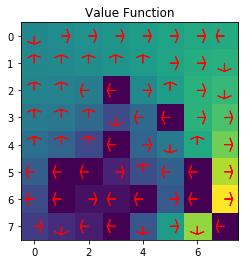

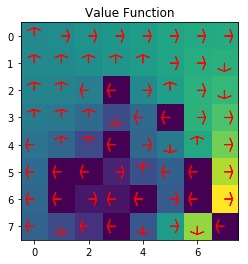

Q value (Numpy Version) :
[ 0.40483  0.40961  0.40961  0.41029]
Q value :
[ 0.40956  0.41371  0.41371  0.41469]


In [12]:
def v2q(env,value,gamma=0.99):
    # Extract World Information    
    obs_space = env.observation_space
    n_state = obs_space.n
    act_space = env.action_space
    n_act = act_space.n
    
    # Transition Probability
    P = env.unwrapped.P

    q = np.zeros((n_state,n_act)) # Compute Q value    
    for s in range(n_state): # For all states s
        for a in range(n_act): # For all actions a
            for prob, next_s, reward, done in P[s][a]: # For all possible transitions s'
                q[s,a] += (reward + gamma*value[next_s])*prob
    return q

policy_np, value_np = value_iteration_np(env)
policy, value = value_iteration(env)

q_np = v2q(env,value_np)
q = v2q(env,value)

plot_results(policy_np, value_np)
plot_results(policy, value)

print("Q value (Numpy Version) :")
print(q_np[0])
print("Q value :")
print(q[0])

In [13]:
value[8*0 + 8+1]

0.42125292396538655

In [14]:
value_np[8*0 + 8+1]

0.41780671898216526

###### Bellman Equation(Prediction)

$$\begin{align}
v_{\pi}(s) &\doteq \mathbb{E} \big[ G_t \mid S_t = s \big] \\
&= \color{blue}{\sum_a \pi(a \mid s)} ~ q_{\pi}(s, a) \\
&=\color{red}{ \color{blue}{\sum_a \pi(a \mid s)} \sum_{s', r} p(s', r \mid s, a) \big[ r + \gamma v_{\pi}(s') \big]} \\
\\
q_{\pi}(s, a) &\doteq \mathbb{E} \big[ G_t \mid S_t = s, A_t = a \big] \\
&= \sum_{s', r} p(s', r \mid s, a) ~ \big[ r + \gamma v_{\pi}(s') \big] \\
&=\color{red}{ \sum_{s', r} p(s', r \mid s, a) \big[ r + \gamma \color{blue}{\sum_{a'} \pi(a' \mid s')} ~ q_{\pi}(s', a') \big]} \\
\\
v_{\pi}(s') &\doteq \mathbb{E} \big[ G_t \mid S_t = s' \big] \\
&= \color{blue}{\sum_{a'} \pi(a' \mid s')} ~ q_{\pi}(s', a')
\end{align}$$

###### Bellman Optimality Equation(Control)

$$\begin{align}
v^{*}(s) &\doteq \color{blue}{\max_{a}} ~ q^{*}(s, a) \\
&=\color{red}{ \color{blue}{\max_{a}} \sum_{s', r} p(s', r \mid s, a) \big[ r + \gamma v^{*}(s') \big]} \\
\\
q^{*}(s, a) &\doteq \sum_{s', r} p(s', r \mid s, a) ~ \big[ r + \gamma v(s') \big] \\
&=\color{red}{ \sum_{s', r} p(s', r \mid s, a) \big[ r + \gamma \color{blue}{\max_{a'}} ~ q^{*}(s', a') \big]} \\
\\
v^{*}(s') &\doteq \color{blue}{\max_{a'}} ~ q^{*}(s', a')
\end{align}$$